<a href="https://colab.research.google.com/github/JaySanthanam/Programming-for-data/blob/main/Projects/Sea_Level_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using numpy to look for a correlation between time data and sea level rise
---

### Data Source
Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.
https://datahub.io/core/sea-level-rise

The data describes annual sea levels from 1880 to 2013.  Measures are adjusted using two standards: Commonwealth Scientific and Industrial Research Organisation(CSIRO) and National Oceanic and Atmospheric Administration (NOAA)  

Raw Data file:  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv

For this exercise:
*  import the pandas library
*  import the numpy library
*  read the csv dataset containing data on sea-levels from the year 1880 to 2013 into a dataframe (df)
*  use df.head() and df.info() to inspect the data and the column data types



###Note 1
This part is straight forward. I always prefer keeping the url in the main code and leave the function to simply read from the url. This is just in case the url gets changed or if I decide to use the same function but to read another data set from a different url. I feel this allows more flexibility.

In [34]:
import pandas as pd
import numpy as np

def get_data(url): # this function gets data stored as csv file from a given url
  df = pd.read_csv(url)
  return df

url = "https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv"
sea_level = get_data(url)
print(sea_level.head()) #first 5 rows
print(sea_level.info()) #technical summary

   Year  CSIRO Adjusted Sea Level  ...  Upper Error Bound  NOAA Adjusted Sea Level
0  1880                  0.000000  ...           0.952756                      NaN
1  1881                  0.220472  ...           1.173228                      NaN
2  1882                 -0.440945  ...           0.464567                      NaN
3  1883                 -0.232283  ...           0.665354                      NaN
4  1884                  0.590551  ...           1.464567                      NaN

[5 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null    

### Then
---
1.  Calculate some statistics on the level array, eg:
*  mean
*  standard deviation
*  total 

2.  Use the fact that the arrays are aligned (e.g. the first number in the level array is linked to the first year in the year array and display:

*  the year with the biggest rise in level
*  the year with the lowest rise in level

*(**Hint**:  to do this you can use a new numpy function np.where() )*
 ```
np.where(array == value_to_find)
```
*There is some reference material [here](https://thispointer.com/find-the-index-of-a-value-in-numpy-array/)*

**Note**: ```np.where(...)``` will return a tuple containing all indexes where that value was found.  You can print all, or you can print the first value (it is likely that there will only be one in this case) using [0][0].  *With the correct code you should get an answer of 2012*


3.  Calculate the Pearson product-moment correlation coefficient between year and the rise in sea level.  (*Expected output:  0.98 when rounded to 2 decimal places*)

### Note 2:
Before proceeding any further, I want to get rid of null values to make life easier for me. I got the following when I tested for null values (code is now commented since it is unnecessary).


Year                        False

CSIRO Adjusted Sea Level    False

Lower Error Bound           False

Upper Error Bound           False

NOAA Adjusted Sea Level      True

dtype: bool




All columns except NOAA adjusted sea level have no null values. So I will drop that off to make a new data frame. I'm aware that this means that I am missing out on some of the information. But for now, I will work with the CSIRO Adjusted Sea Level. This exact calculations can be repeated with the NOAA adjusted sea level column as well. So I am saving the dataframe after dropping the NOAA column into a new dataframe.

In [35]:
#find any null values
#def any_nulls(df):
#  df_null = df.isna().any()
#  return df_null
#null_values = any_nulls(sea_level)
#print(null_values)

df_new = sea_level.drop(columns=['NOAA Adjusted Sea Level'])
sea_level_arr = np.array(df_new["CSIRO Adjusted Sea Level"],np.float64)
sea_year_arr = np.array(df_new["Year"],np.int64)
sea_mean = np.mean(sea_level_arr)
sea_std = np.std(sea_level_arr)
sea_total = np.sum(sea_level_arr)
print("The average sea level is", "{:10.2f}".format(sea_mean), "\nThe standard deviation of sea_level is", "{:10.2f}".format(sea_std), "\nThe total sea level is", "{:10.2f}".format(sea_total))

max_level = np.amax(sea_level_arr)
min_level = np.amin(sea_level_arr)
max_index = np.where(sea_level_arr == max_level)
max_year = max_index[0] +sea_year_arr[0]
min_index = np.where(sea_level_arr == min_level)
min_year = min_index[0] +sea_year_arr[0]
print("The sea level was highest at", "{:10.2f}".format(max_level), "in the year", max_year)
print("The sea level was lowest at", "{:10.2f}".format(min_level), "in the year", min_year)


The average sea level is       3.65 
The standard deviation of sea_level is       2.48 
The total sea level is     489.15
The sea level was highest at       9.33 in the year [2012]
The sea level was lowest at      -0.44 in the year [1882]


##Note 3:
Next I want to find the Pearson product-moment correlation coefficient between year and the rise in sea level. I'm aware that we are missing NOAA adjusted sea level. We can also repeat the same for that column with just the 21 rows of available data. But for now, I'm going to continue working with CSIRO Adjusted Sea Level for all years from 1880.

In [36]:
def get_correlation(nparray1,nparray2):
  # code to get the correlation figure for both salaries
  R_matrix = np.corrcoef(nparray1, nparray2)
  return R_matrix

R_value = get_correlation(sea_level_arr,sea_year_arr)
print("The Pearson correlation coefficient between year and sea level is:""{:10.2f}".format(R_value[0][1]))
print("This shows that there is a strong correlation between year and rising sea levels")


The Pearson correlation coefficient between year and sea level is:      0.98
This shows that there is a strong correlation between year and rising sea levels


Updated on 02/03/2022:

Task - Add linear regression to do prediction for sea levels. Also, create a new dataframe with predicted sealevels in the future 

In [48]:
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats.stats import pearsonr

def regression_model(x,y):
  lin_model = stats.linregress(x, y)
  return lin_model

def predict_sea_level(m,x,c):
  y = m*x+c
  return y

lin_model = regression_model(sea_year_arr,sea_level_arr)
m = lin_model.slope
c = lin_model.intercept
print(lin_model)
print("The slope is",m)
print("The intercept is",c)
print(f"R-squared: {lin_model.rvalue**2:.4f}")
print("P-value is", lin_model.pvalue)

#predict sea level for years 2014 to 2050 using linear regression
rows =[]
for i in range(2014, 2051):
  rows.append([i,predict_sea_level(m,i,c)])

df_pred = pd.DataFrame(rows, columns=["Year", "predicted_sea-level"])

print(df_pred)


LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715)
The slope is 0.0630445840121348
The intercept is -119.06594196773978
R-squared: 0.9697
P-value is 3.7886969791131554e-102
    Year  predicted_sea-level
0   2014             7.905850
1   2015             7.968895
2   2016             8.031939
3   2017             8.094984
4   2018             8.158029
5   2019             8.221073
6   2020             8.284118
7   2021             8.347162
8   2022             8.410207
9   2023             8.473251
10  2024             8.536296
11  2025             8.599341
12  2026             8.662385
13  2027             8.725430
14  2028             8.788474
15  2029             8.851519
16  2030             8.914564
17  2031             8.977608
18  2032             9.040653
19  2033             9.103697
20  2034             9.166742
21  2035             9.229786
22  2036             9.2928

I would like to see how the linear regression actually looks compared to the data. So let's plot using matplotlib

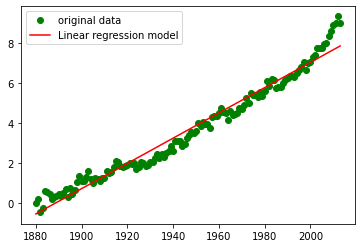

In [39]:
import matplotlib.pyplot as plt
plt.plot(sea_year_arr, sea_level_arr, 'o', color = 'g', label='original data')
plt.plot(sea_year_arr, lin_model.intercept + lin_model.slope*sea_year_arr, 'r', label='Linear regression model')
plt.legend()
plt.show()

How about adding our predictions to the plot?

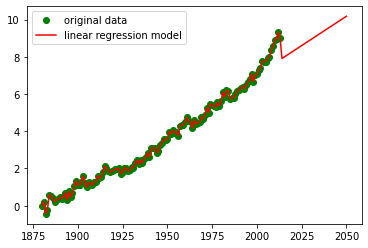

In [49]:
pred_year_arr = np.array(df_pred["Year"],np.int64)
pred_sea_level = np.array(df_pred["predicted_sea-level"],np.float64)
new_year_arr = np.append(sea_year_arr, pred_year_arr, axis = 0)
new_sea_level = np.append(sea_level_arr, pred_sea_level, axis = 0)

plt.plot(sea_year_arr, sea_level_arr, 'o', color = 'g', label='original data')
plt.plot(new_year_arr, new_sea_level, 'r', label='linear regression model')
plt.legend()
plt.show()

The above plot clearly shows that the data (with red line) until 2013 and from 2014 to 2050 the line shows predicted sea level using linear regression. We can clearly see that the linear regression prediction is slightly lower than actual data points (from both plots). A polynomial model might be more accurate for predicting the sea level than linear regression model.

Regarding the programming with python- I have now applied my skills to use linear models, plot and visualize data, using numpy arrays, appending arrays and creating new dataframes from arrays. 

# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer: I have used my data retrieval, cleaning and wrangling skills and have been able to use pandas and numpy libraries for this project. I used pandas library for retrieving, sorting and cleaning the data while I used numpy to do Statistical analyses. 

## What caused you the most difficulty?

Your answer: This was a fairly easy workbook. I think numpy is quite handy when we have large amount of numeric data. The use of arrays and matrices can go beyond use in Statistics and I am keen to know more about using numpy for calculations involving matrices.